In [6]:
# p64 실습
# 아래는 당뇨병 발병 원인과 관련된 데이터이다. 당뇨병 발생을 예측하기 위해 회귀분석을 실시하고 결과를 해석하시오
# 데이터 : DIABETES.csv(변수 : 11개, 자료 수 : 442개)

# 1. 데이터 구성하기
# 2. 변수 간의 경향성 파악 : 그래프 분석
# 3. 회귀 모델 생성
# - 모델의 적합성 검토
# → 분산분석 확인 / 결정계수 확인
# - 회귀계수 유의성 검토(표준화 회귀계수 포함)
# - 다중공선성 검토

# 4. 결론 도출

import pandas as pd # 데이터 구성 : Series, DataFrame
import numpy as np # 행렬 연산
import matplotlib # 데이터 시각화
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.formula.api as smf # 선형 회귀모델 formula(y ~ X1 + X2 + ...)
from statsmodels.api import qqplot, add_constant # 잔차의 정규성 확인 : qqplot, 회귀분석의 상수항 추가 : add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor # 다중공선성 확인
from sklearn.model_selection import train_test_split # 학습용/평가용 데이터 분리 : train, test
from sklearn.linear_model import LinearRegression # 선형회귀모형
from sklearn.feature_selection import RFE # 변수선택법(후진제거법)
from sklearn.preprocessing import StandardScaler # Scale 변환 -> 표준화 회귀계수 산출
from sklearn.metrics import r2_score # 평가함수

In [7]:
# 한글 폰트
matplotlib.rc("font", family = "Malgun Gothic") # 맑은 고딕 적용
matplotlib.rc("axes", unicode_minus = False) # 음수 표시

In [8]:
# [1] 데이터 구성하기
# 데이터 불러오기
df_raw = pd.read_csv("/home/piai/다운로드/2주차 실습파일/2. Big Data 분석/DIABETES.csv", encoding = 'euc-kr')
df_raw.head()
# 몸무게와 키가 단위와 같이 들어있음.

,Y,AGE,GENDER,BMI,BP,CHOLESTEROL,LDL,HDL,TCH,LTG,GLUCOSE
0,151,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87
1,75,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69
2,141,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85
3,206,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89
4,135,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80


In [9]:
# 결측치 확인
df_raw.isnull().sum()

Y              0
AGE            0
GENDER         0
BMI            0
BP             0
CHOLESTEROL    0
LDL            0
HDL            0
TCH            0
LTG            0
GLUCOSE        0
dtype: int64

In [ ]:
# 당뇨병이란 혈액 중의 포도당(혈당)이 높아서 소변으로 포도당이 넘쳐나오는 것
# 당뇨병은 고령, 비만, 스트레스, 약물 등 유발 환경인자가 많음

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

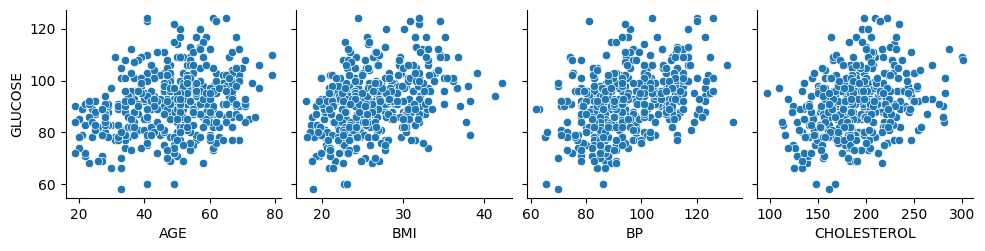

In [21]:
# [2] 변수간의 경향성 파악 : 그래프 분석

# 산점도 행렬 : 목표변수와 설명변수 지정
sns.pairplot(df_raw_dummy, y_vars = "GLUCOSE", x_vars=["AGE", "BMI", "BP", "CHOLESTEROL"])

# y축 GLUECOSE 컬럼과 x축 AGE, BP, CHLESTEROL, BMI 더미 값의 변수간 관계를 확인한다.
# 결론 : 목표변수(포도당, GLUCOSE)와 다수 설명변수간의 선형관계 확인
# 산점도에서 이상치 확인 (BMI)

# 변수간 관계 확인 sns.pairplot
# seaborn 패키지를 이용하면 더 간단하게 그림을 그릴 수 있다.

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

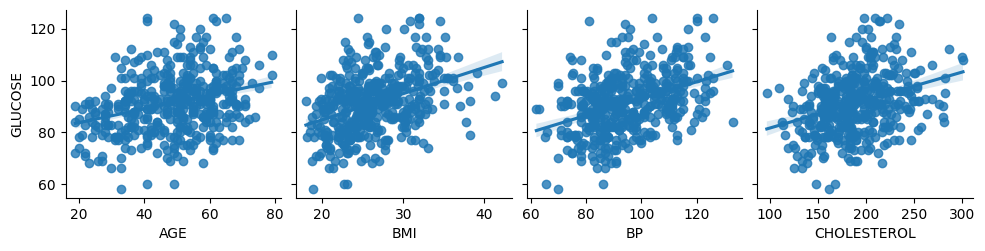

In [24]:
# 회귀 적합선 추가 : kind = "reg"
sns.pairplot(df_raw_dummy, y_vars="GLUCOSE", x_vars=["AGE", "BMI", "BP", "CHOLESTEROL"], kind = "reg")

# 이상치 처리 검토 및 적절한 설명변수 선택 필요

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

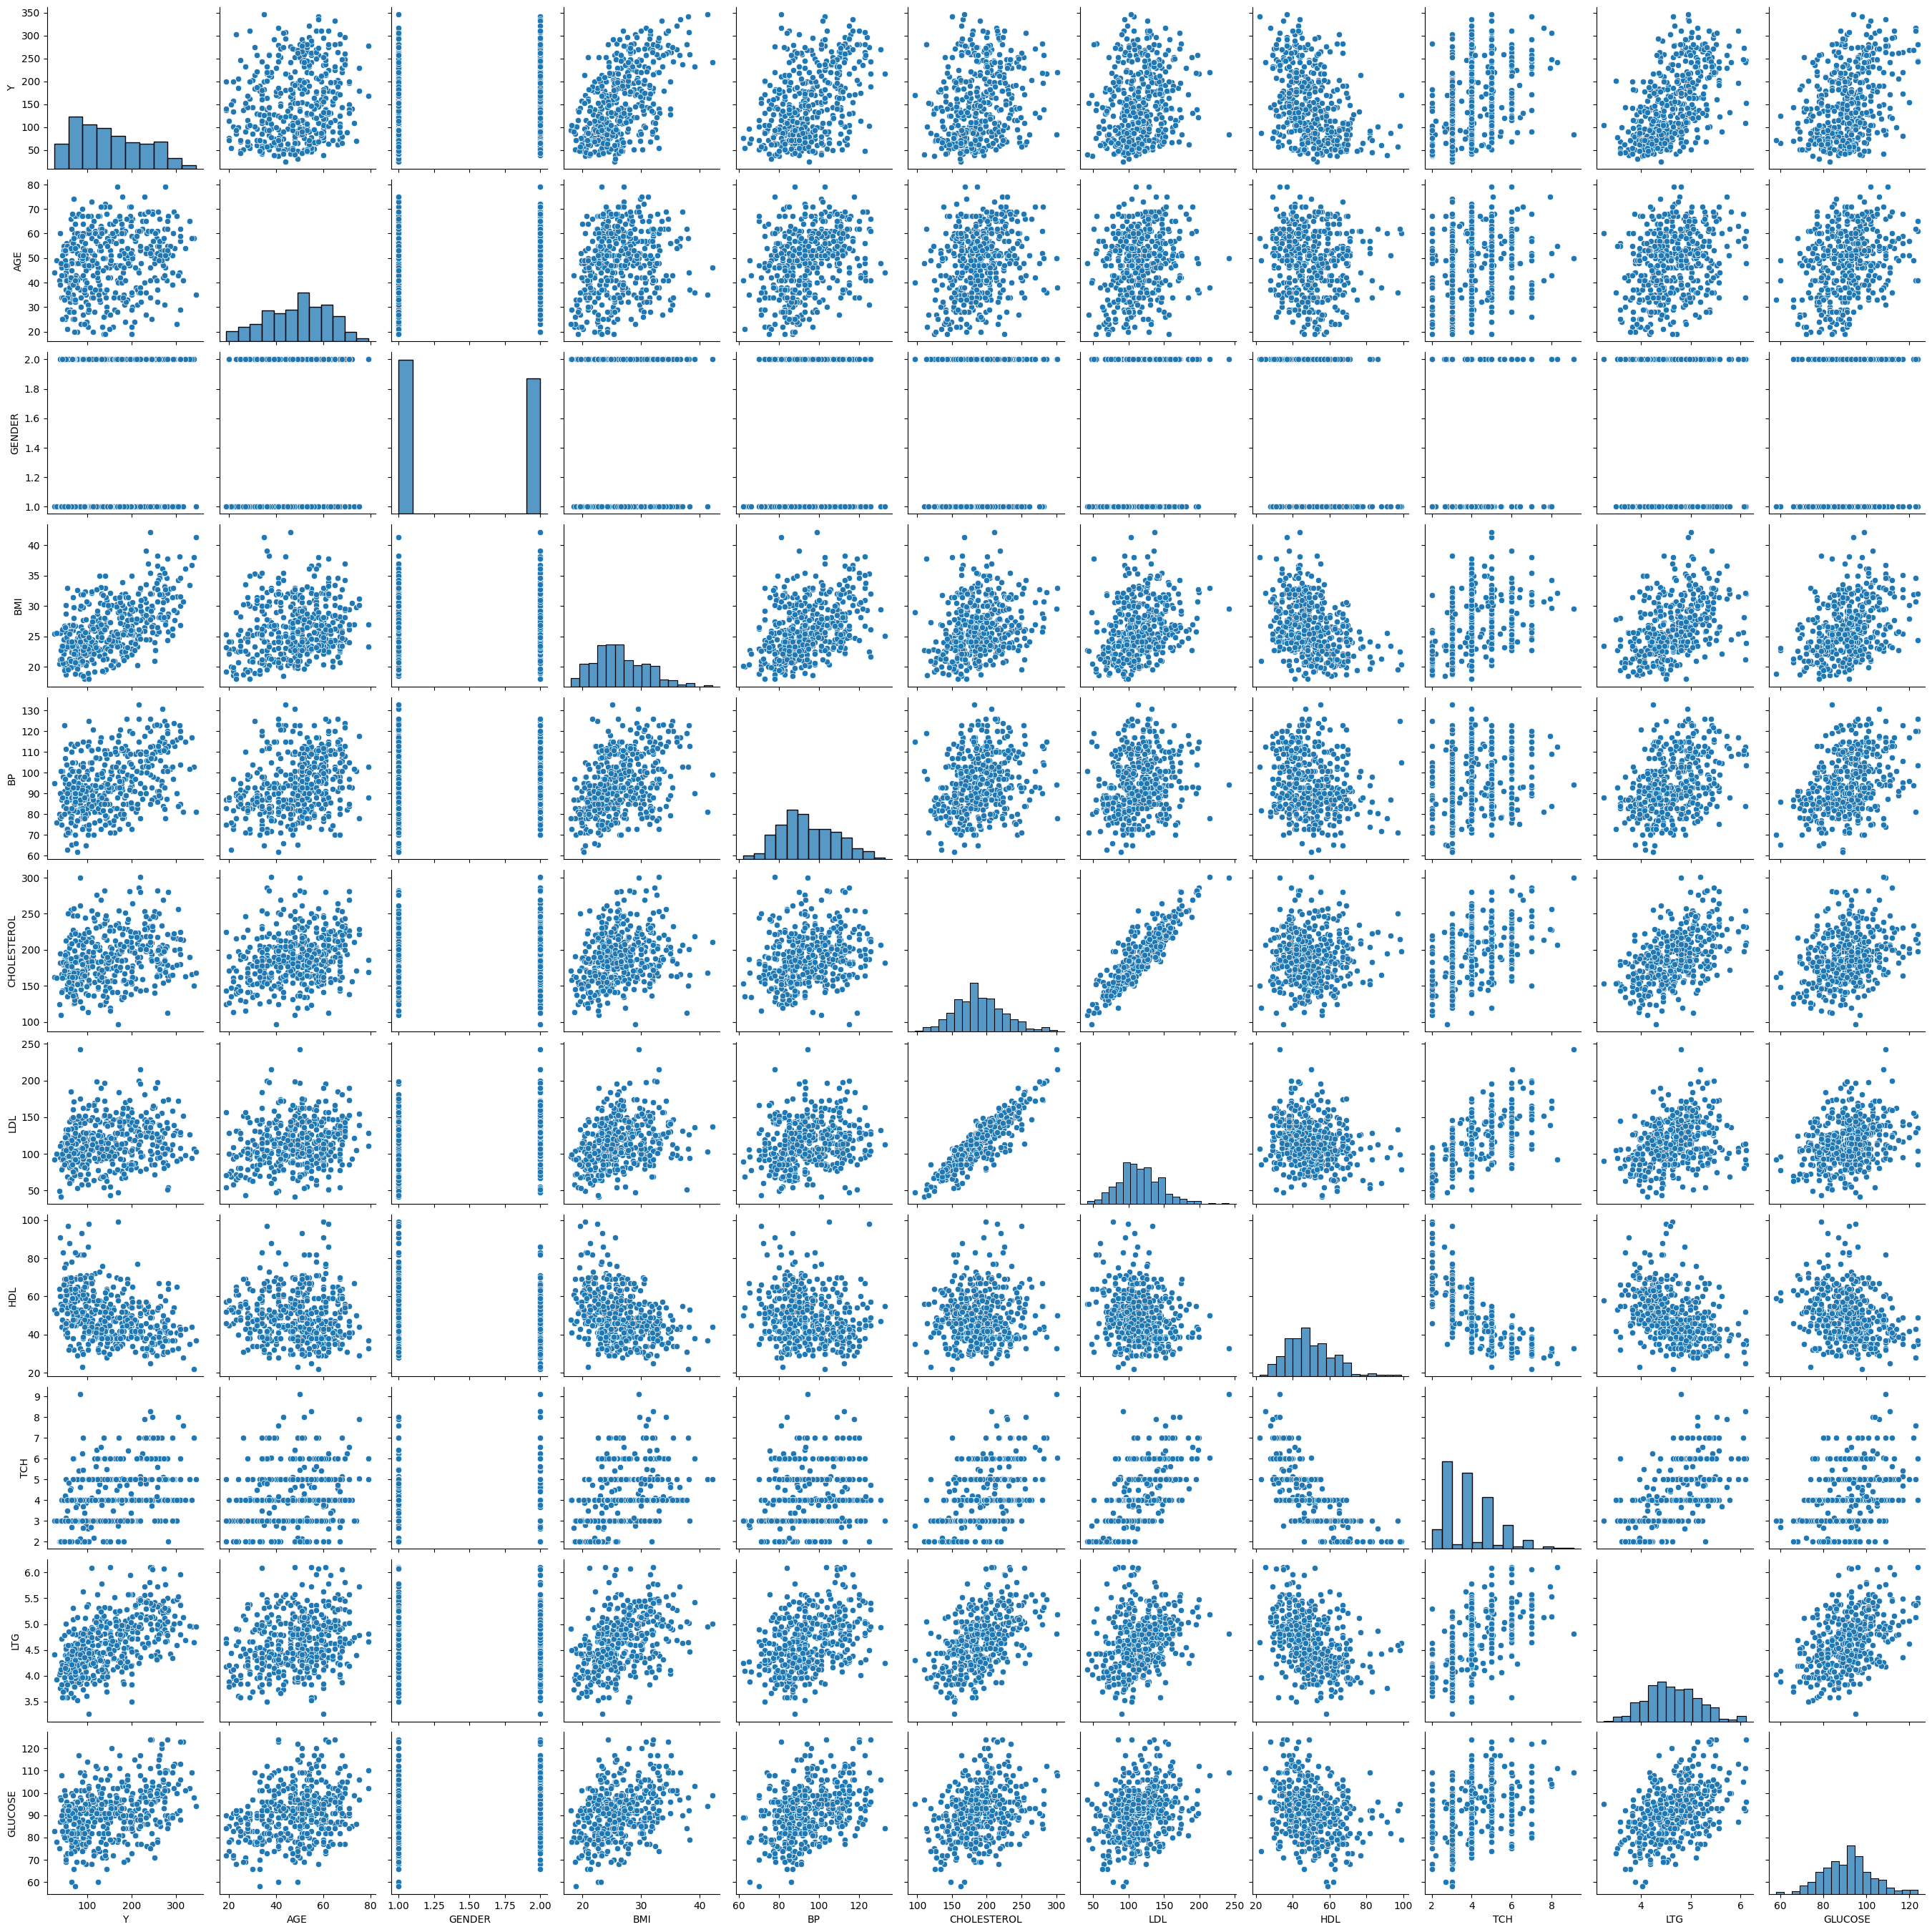

In [25]:
# 산점도 행렬 : 전체 숫자형 변수
sns.pairplot(df_raw_dummy)

# 목표변수(GLUCOSE)와 선형관계가 있는 설명변수 확인됨
# 설명변수 간의 선형관계 확인됨
# -> BMI, CHOLESTEROL 등

# 설명변수 간의 다중공선성 처리 필요

In [26]:
# 상관관계 분석
df_raw_dummy.corr().round(3)

# GLUCOSE와 BMI BP CHOLESTEROL 간의 높은 선형관계 확인
# 설명변수 상관관계 : 다수 설명변수 간의 선형관계 확인 -> 다중공선성 확인 및 처리 필요

,Y,AGE,GENDER,BMI,BP,CHOLESTEROL,LDL,HDL,TCH,LTG,GLUCOSE
Y,1.000,0.188,0.043,0.586,0.441,0.212,0.174,-0.395,0.430,0.566,0.382
AGE,0.188,1.000,0.174,0.185,0.335,0.260,0.219,-0.075,0.204,0.271,0.302
GENDER,0.043,0.174,1.000,0.088,0.241,0.035,0.143,-0.379,0.332,0.150,0.208
BMI,0.586,0.185,0.088,1.000,0.395,0.250,0.261,-0.367,0.414,0.446,0.389
BP,0.441,0.335,0.241,0.395,1.000,0.242,0.186,-0.179,0.258,0.393,0.390
CHOLESTEROL,0.212,0.260,0.035,0.250,0.242,1.000,0.897,0.052,0.542,0.516,0.326
LDL,0.174,0.219,0.143,0.261,0.186,0.897,1.000,-0.196,0.660,0.318,0.291
HDL,-0.395,-0.075,-0.379,-0.367,-0.179,0.052,-0.196,1.000,-0.738,-0.399,-0.274
TCH,0.430,0.204,0.332,0.414,0.258,0.542,0.660,-0.738,1.000,0.618,0.417
LTG,0.566,0.271,0.150,0.446,0.393,0.516,0.318,-0.399,0.618,1.000,0.465


In [27]:
# 회귀 모델 생성
# train/test data 분리

df_train, df_test = train_test_split(df_raw_dummy, test_size = 0.3, random_state = 1234)
# test_size : 테스트 데이터 비율 설정
# random_state : 초기 난수 값 설정
# 훈련 데이터와 테스트 데이더를 분리할 건데 더미값에서 테스트 데이터 비율을 정하고 초기 난수 값을 설정한다.
print("train data size : {}".format(df_train.shape))
print("test data size : {}".format(df_test.shape))

# test_size : 테스트 데이터 비율 설정
# random_state : 초기 난수 값 설정

train data size : (309, 11)
test data size : (133, 11)


In [28]:
# 선형 회귀 분석 : formula 이용. 상수항 (intercept) 자동 추가. 코드 주악ㄴ에서 줄 바꿈 "\" 추가
reg_model = smf.ols(formula = "GLUCOSE ~ Y + AGE + GENDER + BMI + BP + CHOLESTEROL + LDL + HDL + TCH + LTG", data = df_train)
# 적합
reg_result = reg_model.fit()
print(reg_result.summary())

# 회귀 모델 생성 : 설명변수 전체

                            OLS Regression Results                            
Dep. Variable:                GLUCOSE   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.322
Method:                 Least Squares   F-statistic:                     15.60
Date:                Tue, 06 Aug 2024   Prob (F-statistic):           1.82e-22
Time:                        07:59:15   Log-Likelihood:                -1123.4
No. Observations:                 309   AIC:                             2269.
Df Residuals:                     298   BIC:                             2310.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      44.2542     14.973      2.956      

In [30]:
# 분석
# Dep.Variable : 내가 예측하고자 한 Y값 데이터 GLUCOSE
# MOdel : OLS 모델 사용
# Method : 최소제곱 / 날 / 시
# No. Observations : 분석 자료 수 309개
# Df Residuals : 잔차 자유도 309 - 10 - 자동할당 1 = 298개
# Df Model : 모델 자유도 Y + AGE + GENDER + BMI + BP + CHOLESTEROL + LDL + HDL + TCH + LTG 총 10개
# R-squared :  0.344%
# Adj. R-squared : 결정계수 32.2%
# F-statistic : 분산분석결과 15.60
# Prob(F-statistic) : 회귀식이 유의미한지 판단. 0.05이하여서 변수끼리 매우 관련있다고 판단
# AIC : 표본의 개수와 모델의 복잡성을 기반으로 모델을 평가. 수치가 낮을 수록 좋음
# BIC : AIC와 유사하나 패널티를 부여하여 AIC보다 모델 평가 성능이 더 좋다. 수치가 낮을 수록 좋음

# coef : 회귀계수 44.2542
# std err : 계수 추정치의 표준오차
# t : t값, 값이 클수록 상관도가 큼
# P>|t| : 회기계수 검정, p-value # 0.05보다 작아야 유의미함. Y, CHOLESTEROL, LDL, HDL, LTG가 0.05보다 크므로 통계적으로 유의미하지 않다.
# [0.025 0.975] : 회귀 계수의 신뢰구간

# Omnibus : 디아고스티노 검정, 비대칭도와 첨도를 결합한 정규성 테스트. 값이 클수록 정규분포를 따름
# Prob(Omnibus) : 디아고스티노 검정이 유의한지 판단 (0.05이하일 경우 유의미하다고 판단)
# Skew(왜도) : 평균 주위의 잔차들의 대칭하는지를 보는 것.  0에 가까울수록 대칭
# Kurtosis(첨도) : 잔차들의 분포 모양. 3에 가까울수록 정규분포. (음수이면 평평한 형태. 양수는 뾰족한 형태)
# Durbin - Watson : 더빈왓슨 정규성 검정이며, 잔차의 독립성 여부를 판단. (1.5 ~ 2.5 사이일 때 잔차는 독립적이라고 판단 / 0이나 4에 가까울 수록 잔차들은 자기상관을 가지고 있다고 판단))
# Jarque - BEra (JB) : 자크베라 정규성 검정, 값이 클수록 정규분포의 데이터를 사용했다는 것
# Cond. No : 다중공선성 검정. 독립변수간 상관관계가 있는지 보는 것. 10이상이면 다중공선성이 있다고 판단.

In [32]:
# 회귀 모델 생성 : 설명변수 간의 다중공선성 확인
# 설명변수간의 다중공선성 확인 : 설명변수 데이터 생성 및 상수항 추가
df_train_x = df_train.drop('GLUCOSE', axis = 1)
# GLUCOSE 열을 삭제한다.

# statsmodels의 상수항 추가 함수 적용
# 회귀분석의 상수항 추가 : add_constant
df_train_x_const = add_constant(df_train_x)
# df_train_x에 상수항을 추가한다. df_train_x_const를

# DataFrame으로 저장
df_vif = pd.DataFrame()
df_vif["variable"] = df_train_x_const.columns # df_train_x_const행에 variable을 넣는다.
df_vif["VIF"] = [variance_inflation_factor(df_train_x_const.values, i) \
                for i in range(df_train_x_const.shape[1])] # i는 df_train_x_const의 

# VIF 정렬
df_vif.sort_values("VIF", ascending = True).round(2)
# sort_values는 값을 기준으로 레이블을 정렬하는 메서드
# ascending 인수 default 값은 True 오름차순
# ascdening 인수 False 내림차순

# 결론 : CHOLESTEROL의 VIF가 61.01로 높고 LDL도 38.92 높게 나타남 -> 변수 특성, 영향을 고려하여 모델에서 제외 검토

,variable,VIF
2,AGE,1.21
3,GENDER,1.28
5,BP,1.51
4,BMI,1.66
1,Y,2.11
9,TCH,8.64
10,LTG,10.92
8,HDL,16.56
7,LDL,38.92
6,CHOLESTEROL,61.01


In [33]:
# VIF (분산팽창계수) - 보통 10보다 크면 다중공선성이 있다고 판단 (5를 기준으로 하기도 함)
# 다중 공선성을 없애는 가장 기본적인 방법은 다른 독립변수에 의존하는 변수를 없애는 것
# 가장 의존적인 독립변수를 선택하는 방법은 VIF
# VIF는 독립변수를 다른 독립변수로 선형회귀한 성능을 나타낸 것
# variance_inflation_factor로 VIF를 계산
# variance_inflation_factor(추가할 데이터열.values, i) for i in range(추가할 데이터열.shape[1])

# sort_values는 값을 기준으로 레이블을 정렬하는 메서드
# ascending 인수 default 값은 True 오름차순
# ascdening 인수 False 내림차순

In [36]:
# 선형 회귀 분석 : 모델에서 CHOLESTEROL 제거
reg_model = smf.ols(formula = "GLUCOSE ~ Y + AGE + GENDER + BMI + BP + LDL + HDL + TCH + LTG", data = df_train)
# 다중공산성 확인으로 GHOLESTEROL이 61.01로 가장 높게 나타났기 때문에 모델에서 제거한다.

# 적합
reg_result = reg_model.fit()
print(reg_result.summary())

# 제거했을 때 자유도, 결정계수, 회귀계수, 검정 통계량, 유의확률 등 확인
# Df Mdoel 모델 자유도 : 9 <10>
# Adj. R-squared : 32.4% <32.2%>
# coef 회귀계수 : Intercept 40.4122 <-44.2542>
# P > |T| p-value(=검정통계량) : 0.000 (0.003)

                            OLS Regression Results                            
Dep. Variable:                GLUCOSE   R-squared:                       0.343
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     17.38
Date:                Tue, 06 Aug 2024   Prob (F-statistic):           4.39e-23
Time:                        08:13:47   Log-Likelihood:                -1123.4
No. Observations:                 309   AIC:                             2267.
Df Residuals:                     299   BIC:                             2304.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     40.4122      7.967      5.072      0.0

In [38]:
# 다중공선성 재확인
df_train_x = df_train.drop(["GLUCOSE", "CHOLESTEROL"], axis = 1)
# FAT열과 WEIGHT 열을 삭제한다.

# statsmodels의 상수항 추가 함수 적용
df_train_x_const = add_constant(df_train_x)
# df_train_x에 상수항을 추가한다. df_train_x_const를

# DataFrame으로 저장
df_vif = pd.DataFrame()
df_vif["Variable"] = df_train_x_const.columns # df_train_x_const행에 variable을 넣는다.
df_vif["VIF"] = [variance_inflation_factor(df_train_x_const.values, i) \
               for i in range(df_train_x_const.shape[1])] # i는 df_train_x_const의 
# 회귀 모델 생성 : 설명변수 간의 다중공선성 처리

# VIF 정렬
df_vif.sort_values("VIF", ascending = True).round(2)
# VIF를 오름차순으로 정려하고 소숫점 두자리까지 표현한다.

# 결론 : 전체가 vif 10보다 작아져서 다중공선성이 해결됨
# 전후 비교해보기

,Variable,VIF
2,AGE,1.21
3,GENDER,1.28
5,BP,1.50
4,BMI,1.66
1,Y,2.10
9,LTG,2.34
6,LDL,2.71
7,HDL,3.61
8,TCH,7.40
0,const,225.38


findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

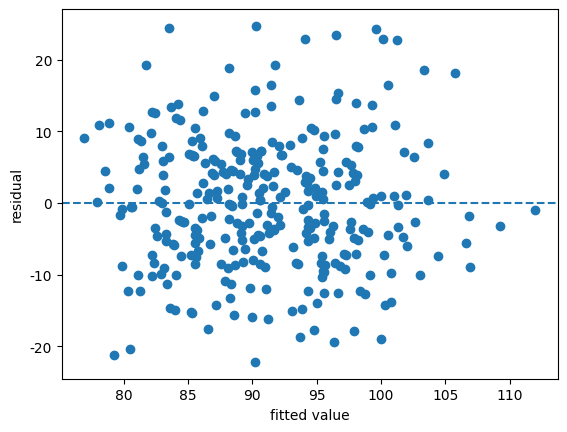

In [39]:
# [3] 회귀모델 생성
# 등분산성 검정
# 잔차 산점도 : X-예측값, Y-잔차

plt.scatter(reg_result.fittedvalues, reg_result.resid)
plt.xlabel("fitted value"); plt.ylabel("residual") # xlabel, ylabel 이름 설정
plt.axhline(y = 0, linestyle = "--") # 가로선 y = 0일 기준으로 -- 표시

# 잔차가 y=0을 기준으로 Random하게 산포되어 있으므로 등분산성을 만족

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

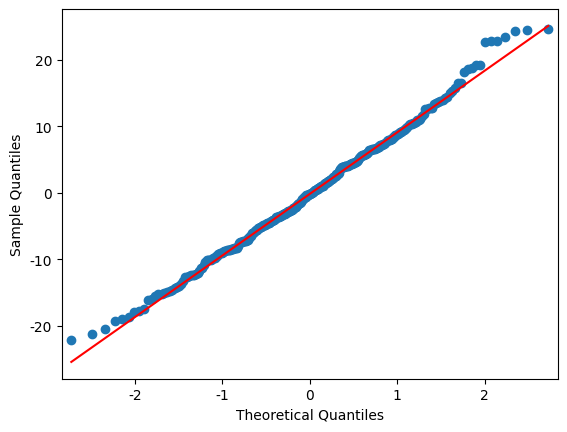

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

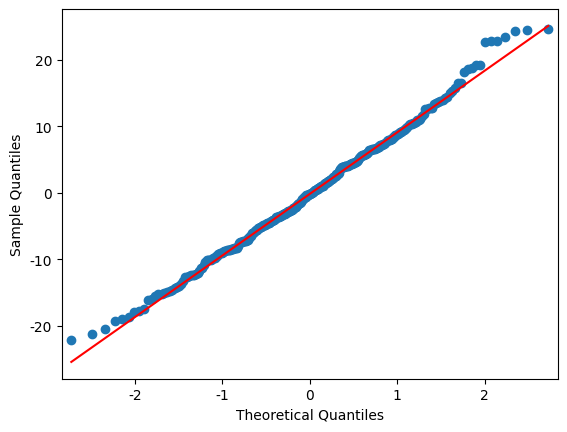

In [40]:
#2. 정규성 검정
# 잔차 정규성 검정 : Q-Q plot, s-standardized line,
# r-regression line, q-quartiles
qqplot(reg_result.resid, line = "q")

# 정규분포 직선(적색 선)을 중심으로 분포하므로 정규분포를 따름

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

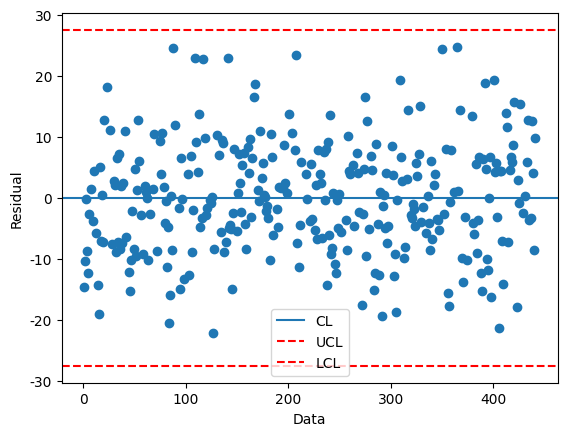

In [41]:
# 회귀 모델 생성 : 잔차의 가정 확인
# 독립성 검정
# 잔차의 독립성 확인
plt.scatter(df_train.index, reg_result.resid)
plt.xlabel("Data"); plt.ylabel("Residual")
plt.axhline(y=0, linestyle = "-", label = 'CL')
plt.axhline(y=3*np.std(reg_result.resid), linestyle="--", color = "red", label = 'UCL')
plt.axhline(y=-3*np.std(reg_result.resid), linestyle="dashed", color = "red", label = 'LCL')
plt.legend()

# 잔차가 y=0을 기준으로 관리상하한을 벗어나지 않고, Random하게 산포되어 있으므로 독립성을 만족

In [42]:
# 평가용 데이터에 대한 성능 확인
train_pred = reg_result.predict(df_train) # df_train에 대한 예측값을 train_pred 변수에 저장
test_pred = reg_result.predict(df_test) # df_test에 대한 예측값을 test_pred 변수에 저장
print("train data의 결정계수:", r2_score(df_train['GLUCOSE'], train_pred))
print("test data의 결정계수:", r2_score(df_test['GLUCOSE'], test_pred))

# train data의 결정계수는 34.3% test data의 결정계수는 25.9%

# R2 Score
# 결정 계수는 R2 Score이라고 불리는 선형 회귀 분석시 사용되는 회귀 모델의 적합도를 나타내는 지표 중 하나
# R2 Score은 0과 1사이의 값으로 나타내고, 높을수록 모델이 데이터를 잘 설명한다는 것을 의미

# SSE/SST가 R2-Scroe(결정계수)
# SSE/SST 혹은 1-(SSR/SST)가 바로 결정계수이다.

train data의 결정계수: 0.343471248761567
test data의 결정계수: 0.25913397034606644


In [43]:
#평가용 데이터에 대한 실제값과 예측값 확인 (10개 확인)
print("test data의 실제값 : \n", df_test['GLUCOSE'].head(10))
print("")
print("test data의 실제값 : \n", test_pred[:10])

test data의 실제값 : 
 353     92
29     104
173     78
131     72
387     73
92      94
40     114
261     95
64      94
74     109
Name: GLUCOSE, dtype: int64

test data의 실제값 : 
 353    91.421217
29     94.690020
173    84.594320
131    79.536613
387    84.730798
92     90.674021
40     93.728648
261    89.905977
64     88.267701
74     91.223952
dtype: float64


In [44]:
# 후진제거법을 이용한 변수 선택
# RFE(recursive feature elimination) 함수 : 입력된 모델을 이용하여 변수중요도가 낮은 순으로 순차적으로 제거

# 목표변수 / 설명변수 분리
df_train_y = df_train['GLUCOSE'] # FAT 행을 y에 저장해놓는다. swap처럼
df_train_x = df_train.drop('GLUCOSE', axis = 1) # FAT 행을 제거 한다.

#sklearn의 선형회귀 모델
model = LinearRegression() #  선형회귀모델 불러오기

# 전체 변수 중 5개의 변수가 남을 때까지 변수 선택
rfe = RFE(estimator = model, n_features_to_select = 5).fit(df_train_x, df_train_y)

# estimator로 선형회귀모델(LinearREgression)을 쓰겠다.
# 즉, 중요도가 높은 5개의 변수가 남을 때까지 실행

# 전체 feature에 대해 훈련 후 중요하지 않은 feature들을 제거하면서 원하는 개수의 feature 수만 남기도록 하는 방법이다.
# estimator : feature importance가 계산 가능한 모델

# n_features_to_select : 남겨질 중요한 feature의 수를 선언. 지정하지 않을 경우 원래 feature의 절반이 선택됨(default값)

# 선택된 변수
selected_cols = df_train_x.columns[rfe.support_]
# 제거된 변수
removed_cols = df_train_x.columns[~rfe.support_]

# support_ : 선택된 feature를 가리키는 마스크를 리턴한다.

print("Select Variables : {}".format(selected_cols))
print("REmoved Variables : {}".format(removed_cols))

# 결론 : 목둘레(NECK), 복부 둘레(ABDOMEN), 발목 둘레(ANKLE), 팔뚝 둘레(FOREARM), 손목 둘레(WRIST) 변수 선택

Select Variables : Index(['GENDER', 'BMI', 'BP', 'TCH', 'LTG'], dtype='object')
REmoved Variables : Index(['Y', 'AGE', 'CHOLESTEROL', 'LDL', 'HDL'], dtype='object')


In [46]:
# 후진제거법을 이용한 변수 선택 및 모델 생성
# 회귀 모델 생성
rfe_reg_model = smf.ols(formula = "GLUCOSE ~ GENDER + BMI + BP + TCH + LTG", data = df_train)

# 적합
rfe_reg_result = rfe_reg_model.fit()
print(rfe_reg_result.summary())

# 수작업으로 변수 선택한 내용과 다름

                            OLS Regression Results                            
Dep. Variable:                GLUCOSE   R-squared:                       0.331
Model:                            OLS   Adj. R-squared:                  0.319
Method:                 Least Squares   F-statistic:                     29.92
Date:                Tue, 06 Aug 2024   Prob (F-statistic):           1.09e-24
Time:                        08:24:02   Log-Likelihood:                -1126.4
No. Observations:                 309   AIC:                             2265.
Df Residuals:                     303   BIC:                             2287.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     40.3814      5.765      7.004      0.0

<Axes: >

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

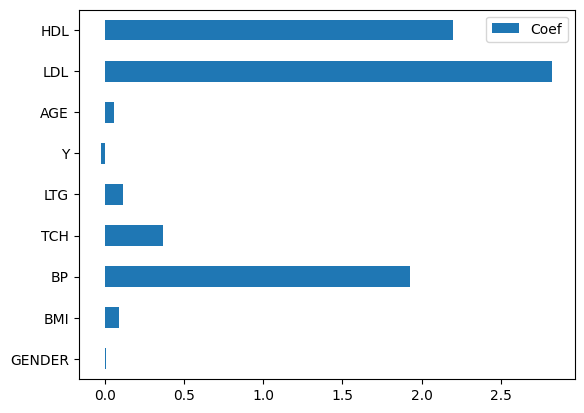

In [49]:
# [4] 결론 도출
# 설명변수 중요도
df_reg_coef = pd.DataFrame({"Coef":reg_result.params.values[1:]},
                          index = ['GENDER', 'BMI', 'BP', 'TCH', 'LTG', 'Y', 'AGE', 'LDL', 'HDL'])
df_reg_coef.plot.barh(y = "Coef")

# 수평 막대 그리기 barh() 

# 중요도는 회귀계수의 절대값 크기
# HDL, LDL가 높을수록 당뇨병이 걸릴 확률이 높음

# 결론 : 표준화 회귀계수를 이용한 변수 중요도 : 생략(회귀계수의 방향은 동일하나 중요도 크기가 변함)